In [56]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
import datetime
%matplotlib inline

In [44]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [53]:
today = datetime.datetime.today()

In [102]:
start_date = '2015-09-01'

In [103]:
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=10.0.185.138;DATABASE=JYDB;UID=js_dev;PWD=js_dev')

In [104]:
query = 'SELECT ss.InnerCode, ss.SuspendDate, ss.SuspendTerm \
         FROM LC_SuspendResumption as ss'

In [105]:
df = pd.read_sql_query(query, con=conn)

In [106]:
df['count'] = 1

In [107]:
df = df.drop_duplicates()

In [108]:
count = df.groupby('SuspendDate').sum()['count']

In [109]:
count = count[count.index >= start_date]

In [110]:
data = w.edb('G8324463,G8324476', start_date, today)

In [111]:
comp = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['SH', 'SZ'])

In [112]:
comp['sum'] = comp['SH'] + comp['SZ']

In [113]:
prop = count / comp['sum']

[Text(1,0,'-10'),
 Text(1,0,'  0'),
 Text(1,0,' 10'),
 Text(1,0,' 20'),
 Text(1,0,' 30'),
 Text(1,0,' 40'),
 Text(1,0,' 50'),
 Text(1,0,' 60'),
 Text(1,0,' 70')]

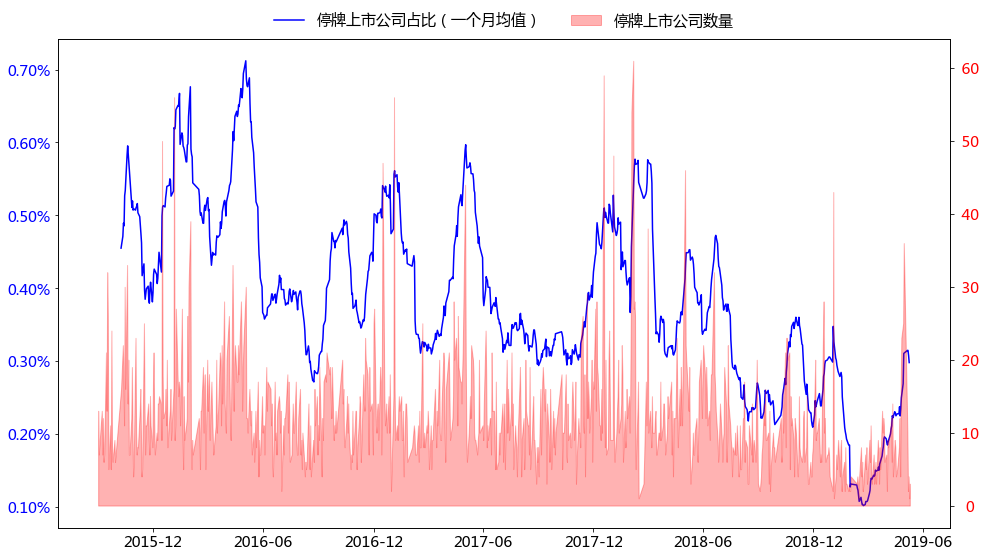

In [114]:
fig, ax = plt.subplots(figsize=(16, 9))

lns1 = ax.plot(prop.dropna().rolling(20).mean(), label=u'停牌上市公司占比（一个月均值）', color='blue')
axx = ax.twinx()
lns2 = axx.fill_between(count.index, 0, count, color='red', alpha=0.3, label=u'停牌上市公司数量')

lns = lns1 + [lns2]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.08))

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}%'.format(x*100) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}'.format(x) for x in vals], color='red')

# _ = ax.set_title(u'', fontsize=25, y=1.08)
# fig.savefig(u'../../picture/流动性-市场深度.jpg', format='jpg', dpi=200, bbox_inches='tight')